#### Custom implementation scatterplot drawing of points (unfortunately no face identification)

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
def plot_surface_levels(fn, b_segs=5, bounds=(-2, 2, -2, 2, -2, 2)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    xmin = bounds[0]
    xmax = bounds[1]
    ymin = bounds[2]
    ymax = bounds[3]
    zmin = bounds[4]
    zmax = bounds[5]
    
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(zmin, zmax, b_segs) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted
    
    for z in B: # plot contours in the XY plane
        # for each value z, calculate z at 100x100 points of X and Y
        X,Y = A1.flatten(),A2.flatten()
        Z = fn(X,Y,z)
        Zz = (Z+z).flatten()
        
        
        # call scatter every loop to create color-layers for debugging purposes
        ax.scatter(X, Y, (Z+z))
        
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
    plt.show()

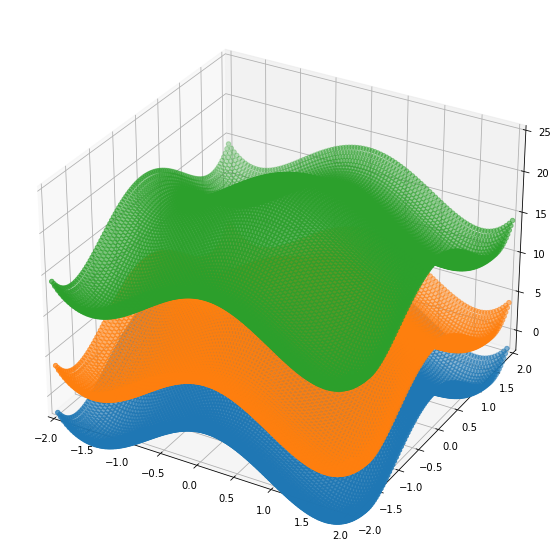

In [6]:
def goursat_tangle(x,y,z):
    return x**4+y**4+z**4+-5.0*(x**2+y**2+z**2)+11.8

plot_surface_levels(goursat_tangle, 13, (-2, 2, -2, 2, -2, 25))

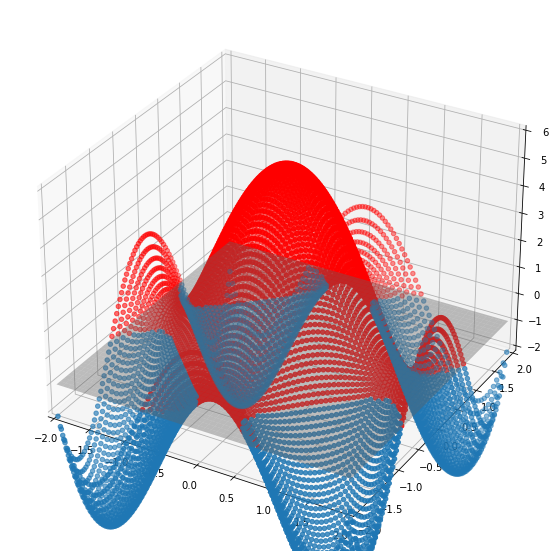

In [147]:
def plot_surface_level_with_plane(fn, bounds=(-2, 2, -2, 2, -2, 2)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    xmin = bounds[0]
    xmax = bounds[1]
    ymin = bounds[2]
    ymax = bounds[3]
    zmin = bounds[4]
    zmax = bounds[5]
    
    intersect_plane = -1
    
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.array([zmin])
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted
    
    Xpoints = []
    Ypoints = []
    Zpoints = []
    
    for z in B: # plot contours in the XY plane
        # for each value z, calculate z at 100x100 points of X and Y
        X,Y = A1.flatten(),A2.flatten()
        Z = fn(X,Y,z)
        Zz = (Z+z).flatten()
        
        indeces = np.argwhere(np.vectorize(lambda i: i >= intersect_plane)(Zz)).flatten()
        inverted_indeces = np.argwhere(np.vectorize(lambda i: i < intersect_plane)(Zz)).flatten()
        
        Xpoints = X[indeces]
        Ypoints = Y[indeces]
        Zpoints = Zz[indeces]
        
        # call scatter every loop to create color-layers for debugging purposes
        ax.scatter(X[inverted_indeces], Y[inverted_indeces], (Z+z)[inverted_indeces])
        
        ax.scatter(Xpoints, Ypoints, Zpoints, color='r')
        
    
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    

    x = np.linspace(-2., 2., 100)
    y = np.linspace(-2., 2., 100)
    z = np.ones(10000)*intersect_plane
    X, Y = np.meshgrid(x, y)
    Z = z.reshape(X.shape)
    ax.plot_surface(X, Y, Z, alpha=0.4, color='grey')
    
    plt.show()
    
    
plot_surface_level_with_plane(goursat_tangle, (-2, 2, -2, 2, -2, 6))

In [2]:
def plot_implicit(fn, b_segs=30, bbox=(-2.5,2.5), rel_tolerance=0.1):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, b_segs) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted
    
    for z in B: # plot contours in the XY plane
        # for each value z, calculate z at 100x100 points of X and Y
        X,Y = A1.flatten(),A2.flatten()
        Z = fn(X,Y,z)
        Zz = (Z+z).flatten()
        
        indeces = np.argwhere(np.vectorize(lambda i: math.isclose(i, z, rel_tol=rel_tolerance))(Zz)).flatten()
        
        Xpoints = X[indeces]
        Ypoints = Y[indeces]
        Zpoints = np.ones(len(indeces))*z
        
        # call scatter every loop to create color-layers for debugging purposes
        ax.scatter(Xpoints, Ypoints, Zpoints)
    

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

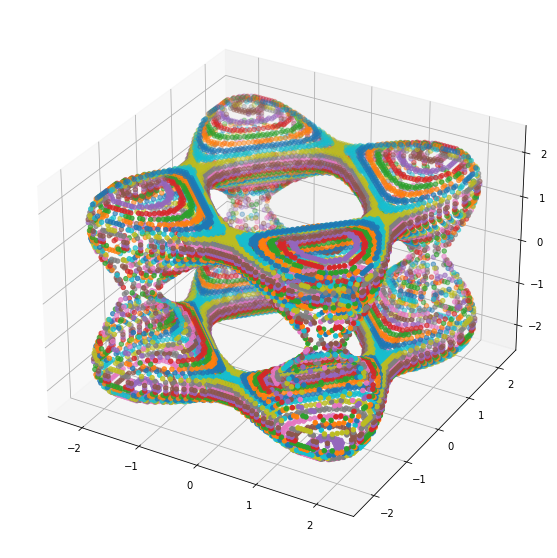

In [4]:
def goursat_tangle(x,y,z):
    return x**4+y**4+z**4+-5.0*(x**2+y**2+z**2)+11.8

plot_implicit(goursat_tangle, 80)

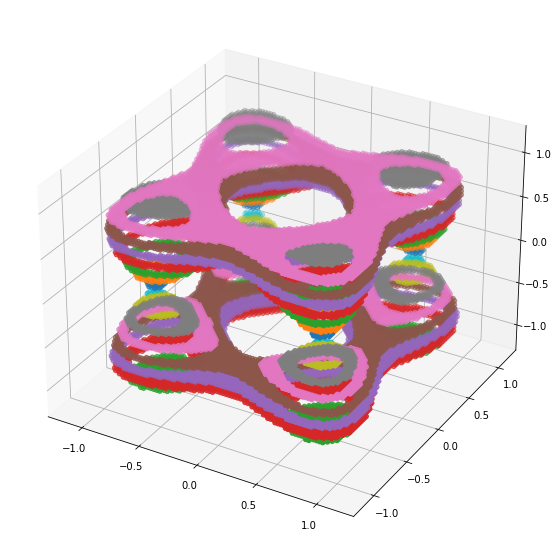

In [4]:
def chubbs(x,y,z):
    return x**4+y**4+z**4-x**2-y**2-z**2+0.5

plot_implicit(chubbs, 20, (-1.25, 1.25))

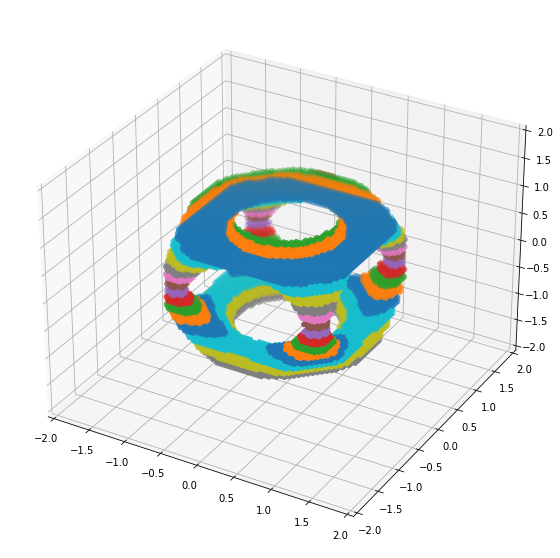

In [80]:
def bcn(x,y,z):
    return ((x**2 + y**2 - 0.852)**2 + (z**2 - 1)**2)*((y**2 + z**2 - 0.852)**2 + (x**2 - 1)**2)*((z**2 + x**2 - 0.852)**2 + (y**2 - 1)**2) - 0.001

plot_implicit(bcn, 30, (-2, 2))

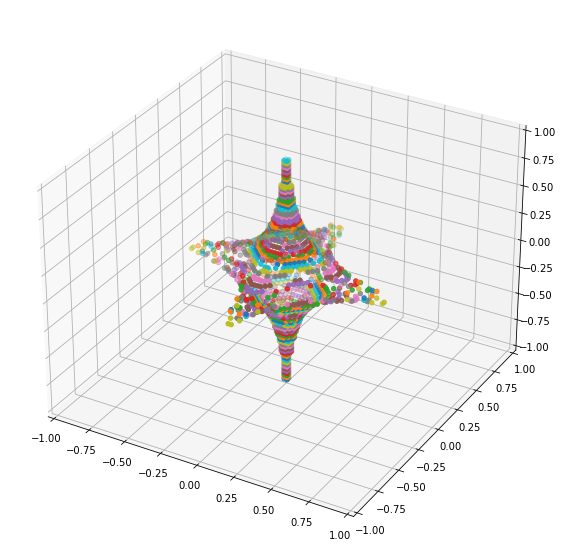

In [6]:
def entzensberger_star(x,y,z):
    return  400*(x**2*y**2 + y**2*z**2 + x**2*z**2)-(1 - x**2 - y**2 - z**2)**3

plot_implicit(entzensberger_star, 100, (-1, 1), 0.2)

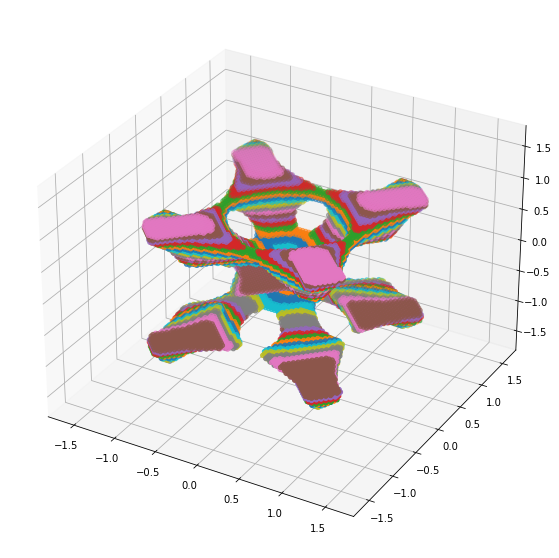

In [152]:
def bc8(x,y,z):
    return  (2.92*(x-1)* x**2 * (x+1)+1.7*y**2)**2 * (z**2 - 0.88)**2 + (2.92*(y-1) * y**2 * (y+1) + 1.7*z**2)**2 * (x**2 - 0.88)**2 + (2.92*(z-1)* z**2 *(z+1) + 1.7*x**2)**2 * (y**2 - 0.88)**2  - 0.02

plot_implicit(bc8, 100, (-1.75, 1.75), 0.2)

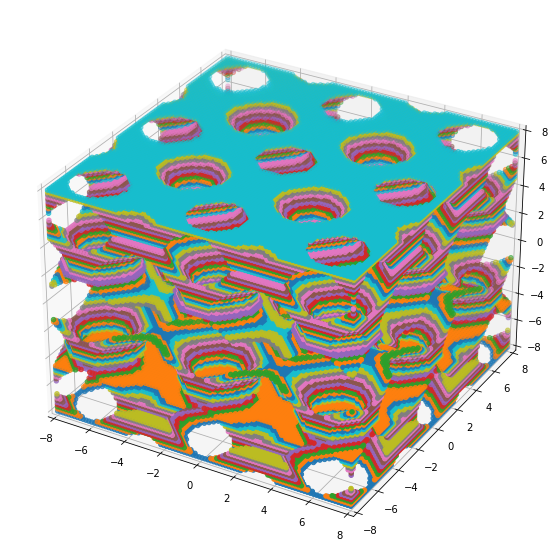

In [61]:
def cosine_segs(x, y, z):
    return np.cos(x) + np.cos(y) + np.cos(z)

plot_implicit(cosine_segs, 100, (-8, 8), 0.1)

#### Wireframe plots (i.e. 3-vertex faces) using mcubes

In [8]:
import mcubes # uses marching cubes algo


def plot_implicit_pymcube(fn, b_segs=20, bbox=(-2.5,2.5), iso_val=0):
    verts, tri = mcubes.marching_cubes_func(
            (bbox[0], bbox[0], bbox[0]), (bbox[1], bbox[1], bbox[1]),    # Bounds
            b_segs, b_segs, b_segs,                                      # Number of samples in each dimension
            fn,                                                          # Implicit function
            iso_val)                                                     # Isosurface value

    vertices, triangles = verts.tolist(), tri.tolist()
    vertices = np.array(vertices).T
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(vertices[0], vertices[1], vertices[2]) # graph just the points
    
    
    for t in triangles:
        ax.plot([vertices[0][t[0]], vertices[0][t[1]], vertices[0][t[2]]],
               [vertices[1][t[0]], vertices[1][t[1]], vertices[1][t[2]]],
               [vertices[2][t[0]], vertices[2][t[1]], vertices[2][t[2]]])
        
    plt.show()

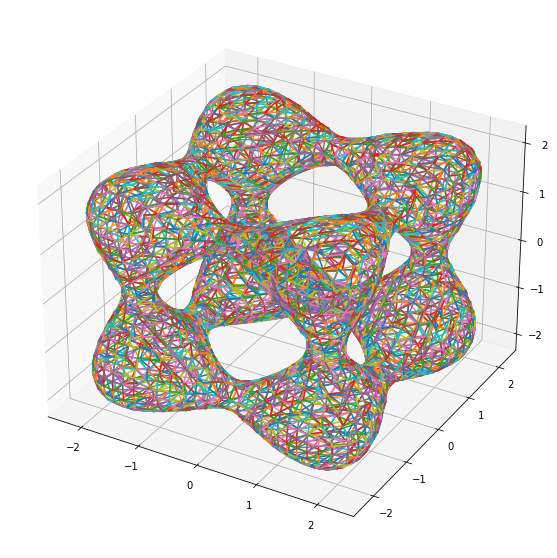

In [10]:
plot_implicit_pymcube(goursat_tangle, 15)

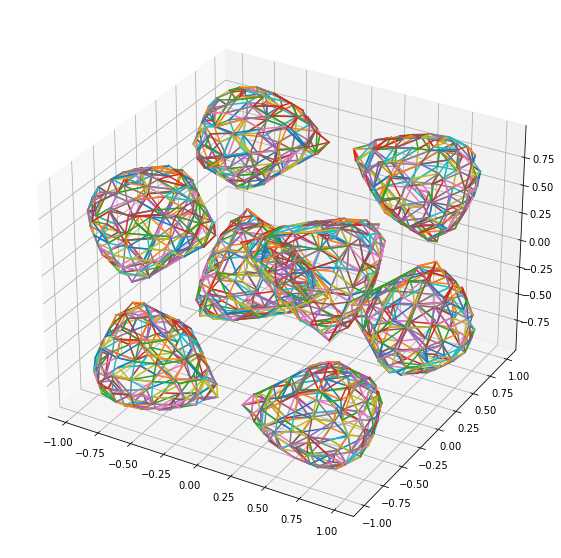

In [135]:
plot_implicit_pymcube(chubbs, 20, (-1.25, 1.25), -0.01)

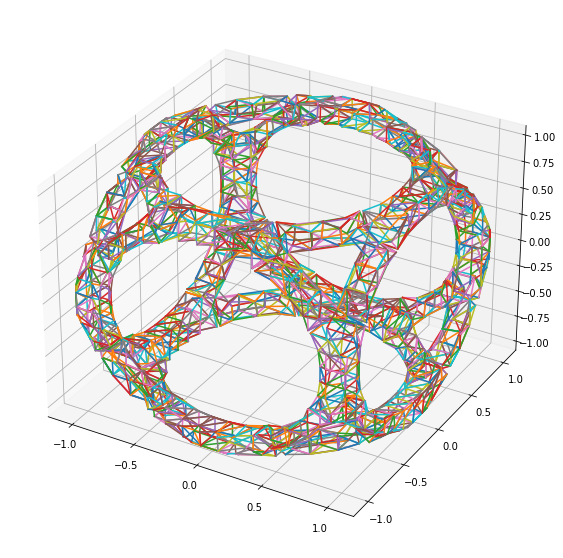

In [136]:
plot_implicit_pymcube(bcn, 30, (-2, 2), 0.01)

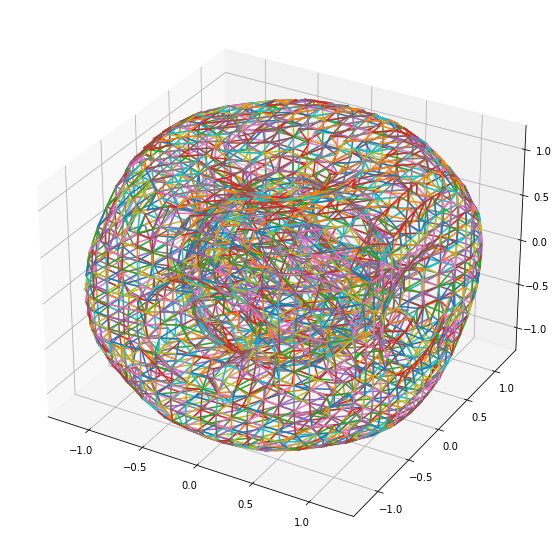

In [137]:
plot_implicit_pymcube(bcn, 30, (-2, 2), 0.5)

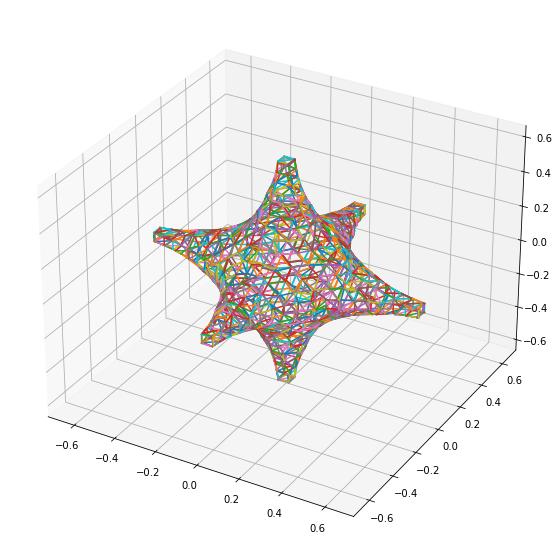

In [145]:
plot_implicit_pymcube(entzensberger_star, 100)

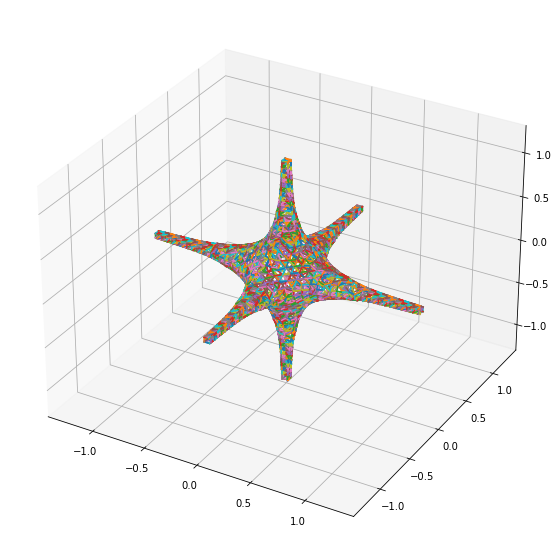

In [146]:
plot_implicit_pymcube(entzensberger_star, 100, iso_val = 1)

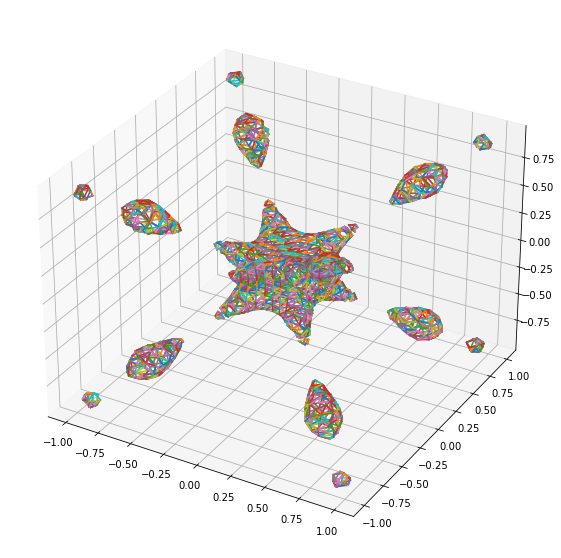

In [147]:
plot_implicit_pymcube(bc8, 60, (-1.75, 1.75))

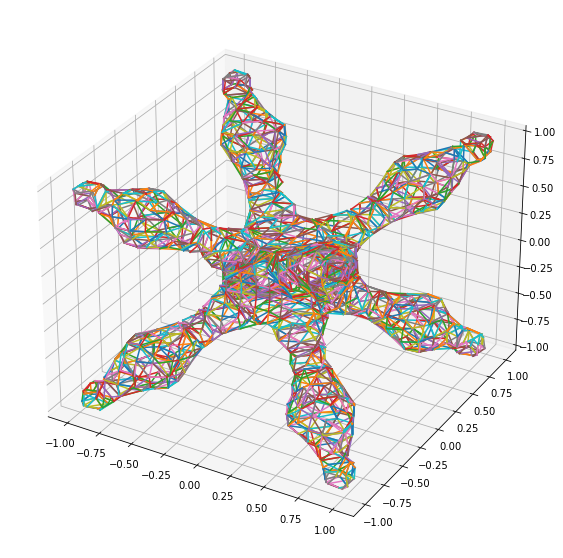

In [167]:
plot_implicit_pymcube(bc8, 60, (-3, 3), 0.05)

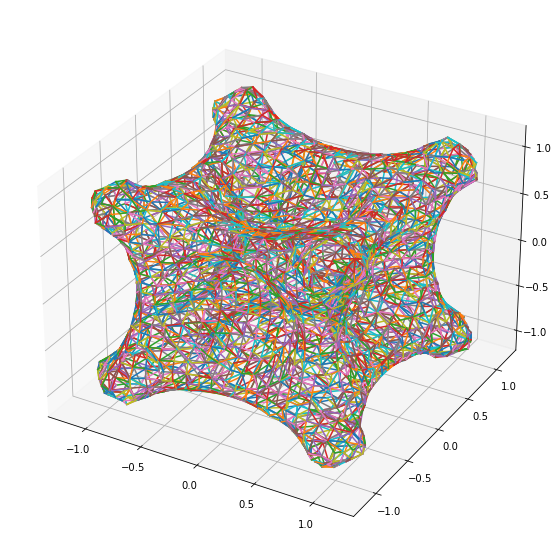

In [168]:
plot_implicit_pymcube(bc8, 60, (-3, 3), 0.3)

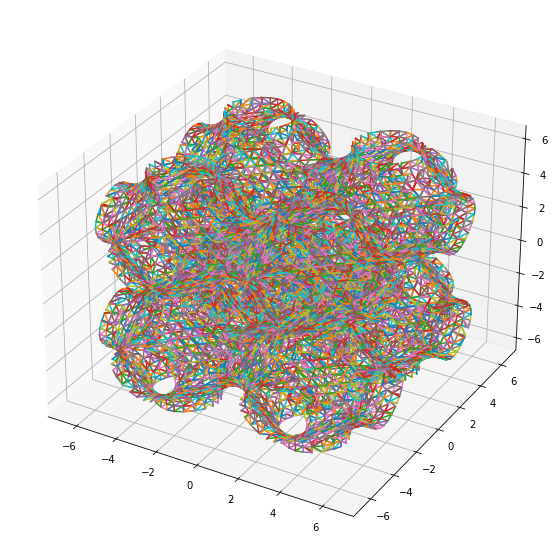

In [142]:
plot_implicit_pymcube(cosine_segs, 40, (-6.5, 6.5))